![header](./figures/logos_partenaires._cmems_se.jpg)

# Quickstart SWOT Swath Filtering

<div style="text-align: right"><i> 2022-08-30 QUICKSTART </i></div>

***
**Authors:**  CLS & Datlas <br>
**Copyright:** 2022 CLS & Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
    <h1><center>Quickstart</center></h1>
    <h5>Context: The row SWOT data will be contaminated by instrumental errors (Gauthier et al., 2016 ; Peral and Esteban-Fernandez, 2018). 
    In order to be able to observe front, mesoscale and sub-mesoscale features the SWOT data will require specific processing. 
    Also, these errors are expected to strongly pollute the derivatives of the SSH data which are used for the computation of geostrophic currents. Hence, being able to remove the SWOT errors are of significant importance to recover information on 2D surface currents and vertical mixing.</h5> 
</div> 


***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***


<div class="alert alert-danger" role="alert">
    
<h3>Learning outcomes</h3>

At the end of this notebook you will know:
<ul>
  <li>How you can display unfiltered, filtered SWOT Level3 SSH products.</li>
  <li>How you can evaluate the median filter: compare filetred with vs simulated target field</li>
</ul>
    
</div>



In [1]:
import os
import glob
import sys
sys.path.remove('/Users/sammymetref/Documents/DataChallenges/DC_IW_crossoverCal/2022a_mapping_HFdynamic')
from src.benchmark import *
from src.plot import *
from src.swot import *
import hvplot.xarray
import matplotlib.pylab as plt

<div class="alert alert-info" role="alert">

<h2>1. Input files to analyse</h2>

</div>

In [2]:
list_of_file = sorted(glob.glob('/Users/sammymetref/Documents/DATLAS/Data/DC_SWOT_KaRIn_Filtering/eNATL60-BLB002/gomez/SWOT_L2_LR_Filtered_013_*.nc'))
len(list_of_file)

270

In [3]:
swt = SwotTrack(list_of_file[3])

<div class="alert alert-info" role="alert">

<h2>2. Compute geostrophic velocities from simulated true SSH karin and from simulated noisy SSH karin </h2>

</div>

In [4]:
swt.compute_geos_current('simulated_true_ssh_karin', 'simulated_true_geos_current')
swt.compute_geos_current('simulated_noise_ssh_karin', 'simulated_noisy_geos_current')

<div class="alert alert-info" role="alert">

<h2>3. Example of INPUT field: Simulated SWOT noisy Sea surface Height data and derived geostrophic current </h2>
<h5> The input SSH field is here polluted by random noise (Left Figure) as precribed by the SWOTsimulator. This noise pollution has a strong impact on the first derivative of the SSH field: the geostrophic currents </h5>
    
</div>

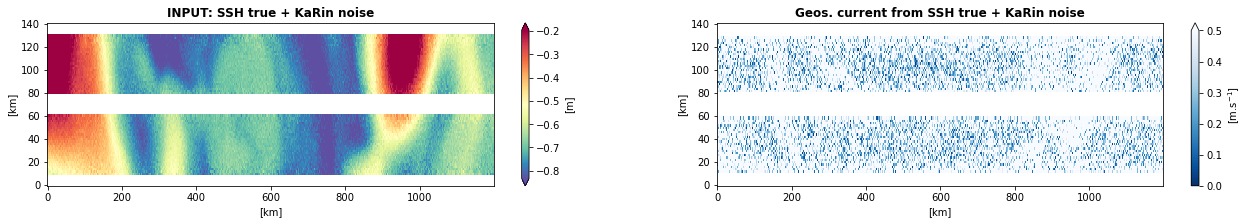

In [5]:
swt.display_demo_input()

<div class="alert alert-info" role="alert">

<h2>4. Example of TARGET field to reconstruct: Simulated True SWOT Sea surface Height data and derived geostrophic current </h2>

</div>

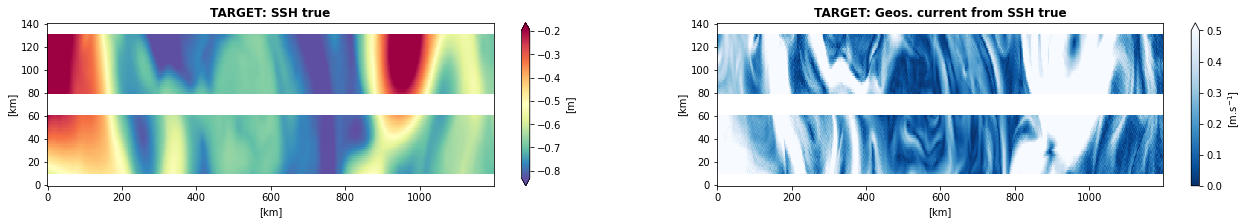

In [6]:
swt.display_demo_target()

<div class="alert alert-info" role="alert">

<h2>5. Apply MEDIAN filter on the SWOT noisy SSH field and compute geostrophic current from this filtered SSH </h2>

</div>

In [7]:
swt.apply_median_filter('simulated_noise_ssh_karin', 10, 'ssh_karin_filt')

In [8]:
swt.compute_geos_current('ssh_karin_filt', 'geos_current_ssh_karin_filt')

<div class="alert alert-info" role="alert">

<h2>6. Display performance of  MEDIAN filter </h2>

</div>

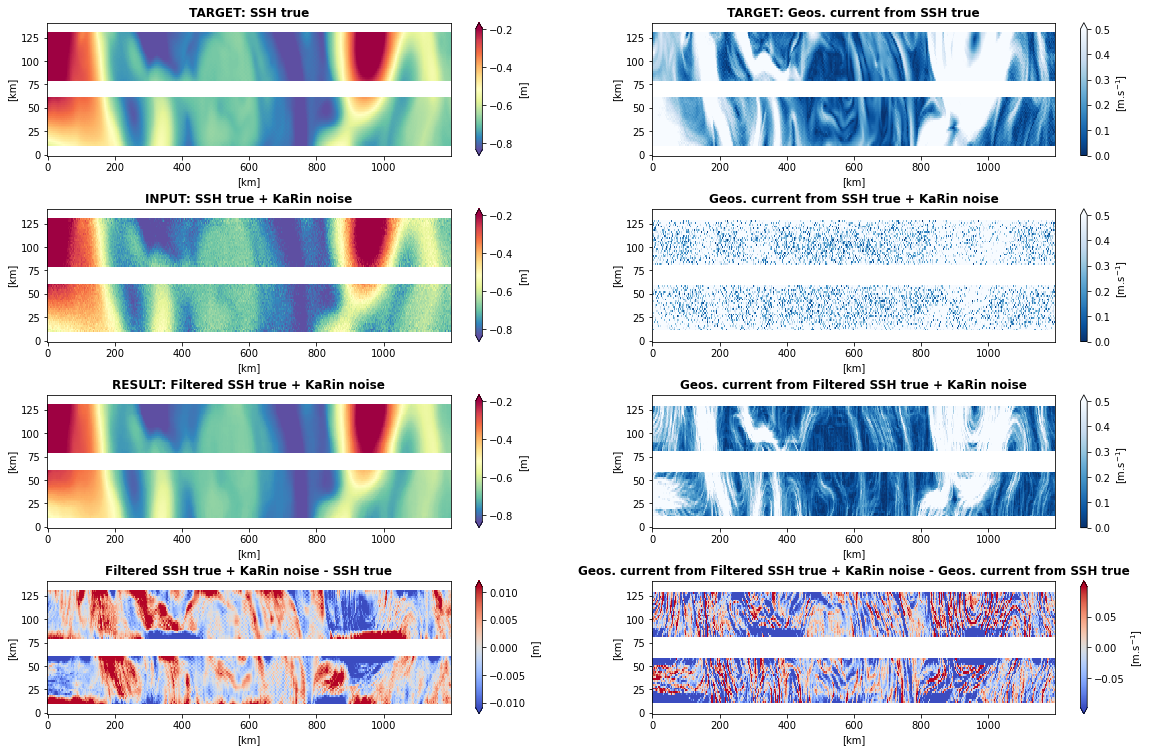

In [9]:
swt.display_result_quickstart()